<img align="right" src="images/banner_siegel.png" style="width:1000px;">

# Plotting data

## Description

This notebook introduces users plotting within the datacube environment. It aims to introduce useful options to visualize raster data in the eo2cube environment. Within this notebook, the following topics are covered:

* Plotting `True Color Composite` and `False Color Composite`
* Plotting `Histogram` to show frequency distributions
* Creating `2D-pseudocolor plot` to illustrate spatial variance
* Creating `Facet Plot` to visualize time series
* `Masking` scene

***

## Setting up
### Load packages

In [21]:
import datacube
from odc.ui import with_ui_cbk # processing bar for loading data
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt # matplotlib is a plotting for creating static, animated, and interactive visualizations
import pandas as pd
import seaborn as sns
%matplotlib inline 

In this script, we need to use two functions from a python script (.py) stored in this environment. 

To import the functions to the current script, we need a relative path to the file and import display_map, rgb (the name of the functions) from DEAPlotting (the name of the file). `sys.path.append()` is used to add a specific path to the python file. 

In [22]:
from dea_tools.plotting import display_map, rgb # this line allows us to use specific functions written in another script

### Load Data

In [23]:
dc = datacube.Datacube(app = '06_plotting')

In [24]:
data = dc.load(product= "s2_c1_l2a",
             x= (9.88 ,10.0),
             y= (49.75, 49.82),
             time= ("2021-03-01", "2021-04-15"),
             output_crs = "EPSG:32734",
             measurements= ["blue", "green", "red","nir", "swir16", "scl"],
             resolution = (-10,10),
             group_by = "solar_day",
             progress_cbk=with_ui_cbk())

Let's have a look at our data.

In [25]:
data

<xarray.Dataset>
Dimensions:      (time: 18, y: 905, x: 977)
Coordinates:
  * time         (time) datetime64[ns] 2021-03-02T10:18:39.025000 ... 2021-04...
  * y            (y) float64 1.558e+07 1.558e+07 ... 1.557e+07 1.557e+07
  * x            (x) float64 -3.002e+05 -3.002e+05 ... -2.905e+05 -2.904e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) uint16 1938 1691 1581 1399 ... 9336 9472 9600 9440
    green        (time, y, x) uint16 2118 1872 1770 1514 ... 8672 8808 8936 8920
    red          (time, y, x) uint16 2274 2032 1958 1564 ... 8600 8672 8808 8816
    nir          (time, y, x) uint16 3493 3307 3235 2758 ... 8688 8816 8952 8952
    swir16       (time, y, x) uint16 3389 3389 3144 3144 ... 5525 5642 5642 5526
    scl          (time, y, x) uint8 5 5 5 5 5 5 4 4 4 5 ... 9 9 9 9 9 9 9 9 9 9
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

## **RGB Image**

To have the first view of our data, we can use the function `rgb()` defined in our written script DEAPlotting, stored in the folder "note_book". `rgb()` can plot different bands in the Data Variables in the red, blue, and green channels (in this order). If we input all three bands accordingly into the channels, it is called a **true color composite**. Otherwise, it is plotted as a **false color composite**.

However, we have to pay attention that the function can only plot in two dimensions (longitude and latitude). Hence, we can only input data array from a single time stamp. Here, we plot only the first time stamp (time = [0]), with col="time" argument, we define the collapse of a time dimension. We can look for the band name under Data Variables of the data set.

#### **1) True Color Composite**
With True color composite, we input all bands accordingly.

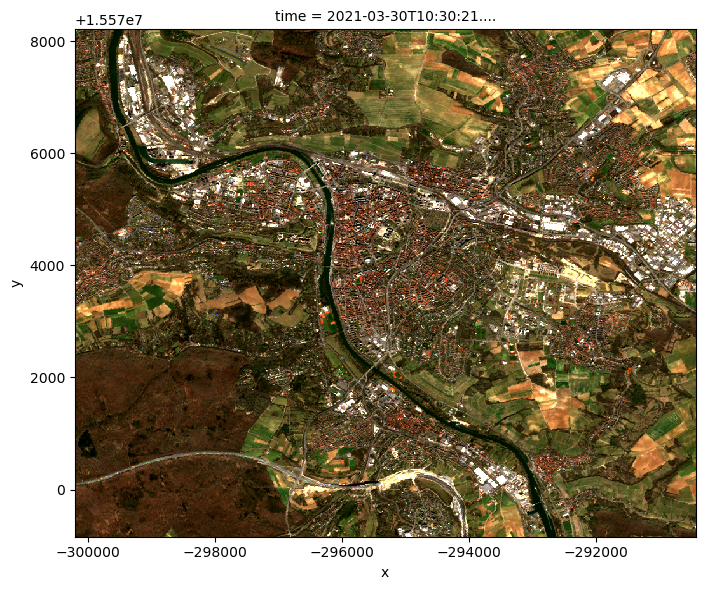

In [26]:
rgb(data.isel(time=[11]), bands=['red', 'green', 'blue'], col="time")

#### **2) False Color Composite**
Here we visualize the Land/Water composite. Try out [different combinations](http://gsp.humboldt.edu/olm/Courses/GSP_216/lessons/composites.html) which fit different purposes.

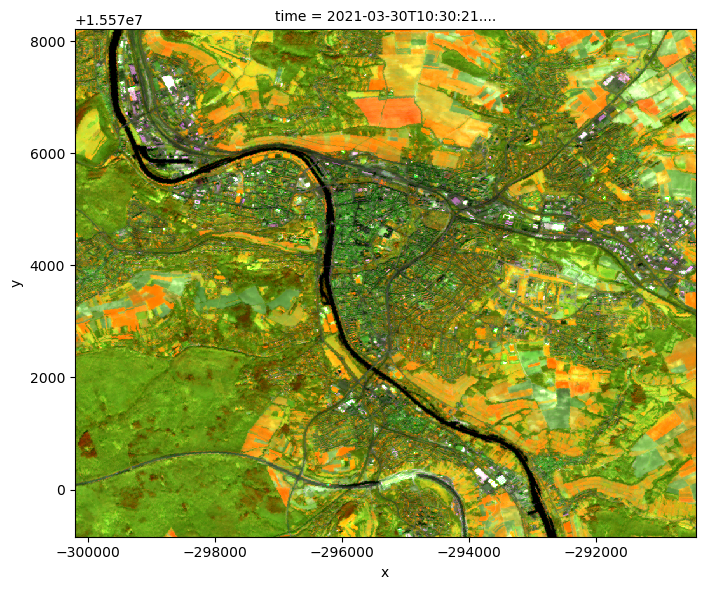

In [27]:
rgb(data.isel(time=[11]), bands=['nir', 'swir16', 'red'], col="time")

## **Histogram**
Besides, we can look at the distribution of pixel values by plotting a histogram (i.e., using plot() for a multi-temporal xarray dataset). We can see that most pixel reflectances lie between 400 and 1000.

(array([4.176267e+06, 3.867088e+06, 2.350894e+06, 2.266841e+06,
        1.859713e+06, 9.297180e+05, 3.099990e+05, 1.201880e+05,
        3.390800e+04, 7.140000e+02]),
 array([    0. ,  1915.2,  3830.4,  5745.6,  7660.8,  9576. , 11491.2,
        13406.4, 15321.6, 17236.8, 19152. ]),
 <BarContainer object of 10 artists>)

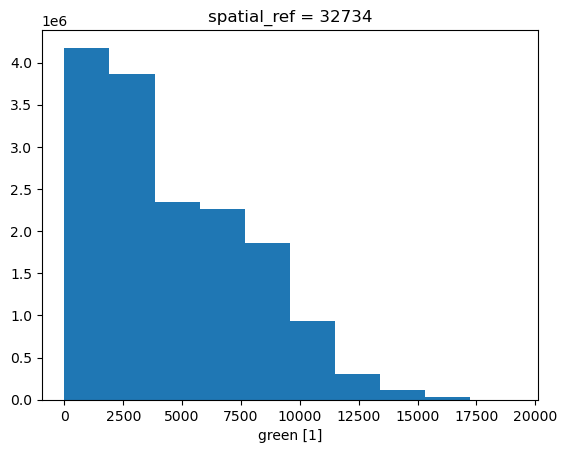

In [28]:
data.green.plot()

## **Scatterplot**

Text(0.5, 1.0, 'Correlation of Red and Green bands')

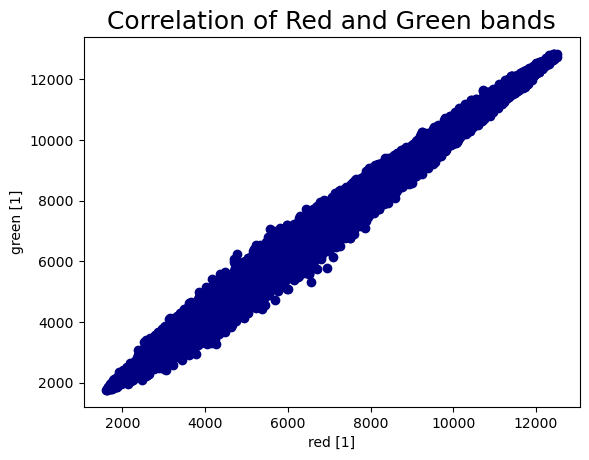

In [29]:
data[['red','green']].isel(time=1).plot.scatter(x='red',y='green', color='navy')
plt.title("Correlation of Red and Green bands", fontsize=18)

## **2D pcolormesh**
#### **1) Plotting Single Band**
We can also directly plot a single individual band using xarray functionality. It is important to note that it only takes a one-time stamp and one data variable by default. Here we plot the red band with the plot function. A specific [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) can be added with the cmap argument, and all the functionality of matplotlib is also available. The argument robust can be used to remove outliers.

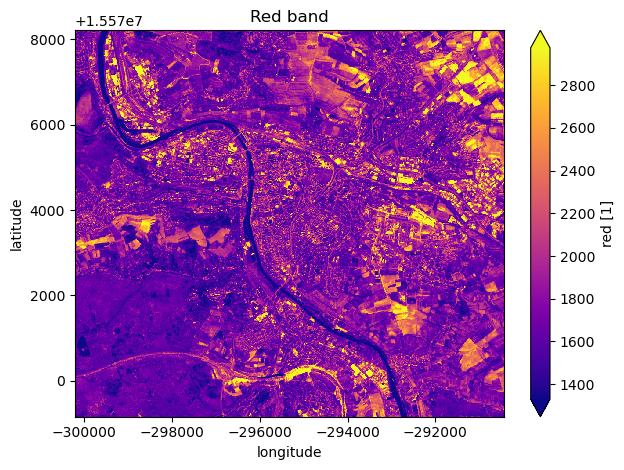

In [30]:
data.red.isel(time=[11]).plot(robust=True, cmap=plt.cm.plasma)

plt.title("Red band") #title
plt.ylabel("latitude") #labels
plt.xlabel("longitude")
plt.tight_layout() #remove excessive space in layout
plt.show() #show plot

#### **2) Facet Plot**
We can plot facet plot with the col="time" argument to show all time stamps. Note that plotting too many time stamps at once is not recommended.

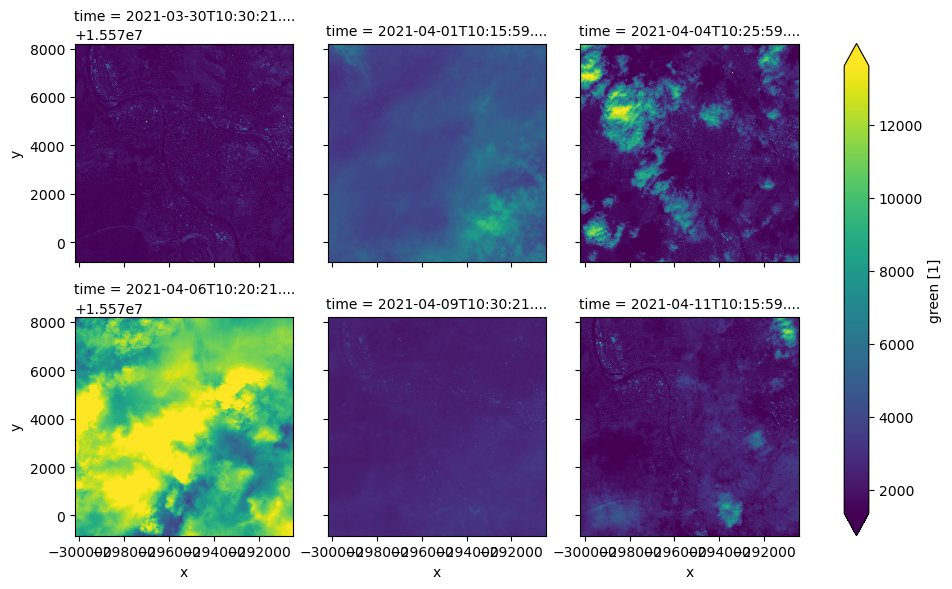

In [31]:
data.isel(time=[11,12,13,14,15, 16]).green.plot(robust=True, col="time", col_wrap=3)

#### **3) Masking**
We can also mask out the area in the plot. The following code excludes the cloud area (scl = 9).

<img align="left" src="scl.png" style="width:250px;">

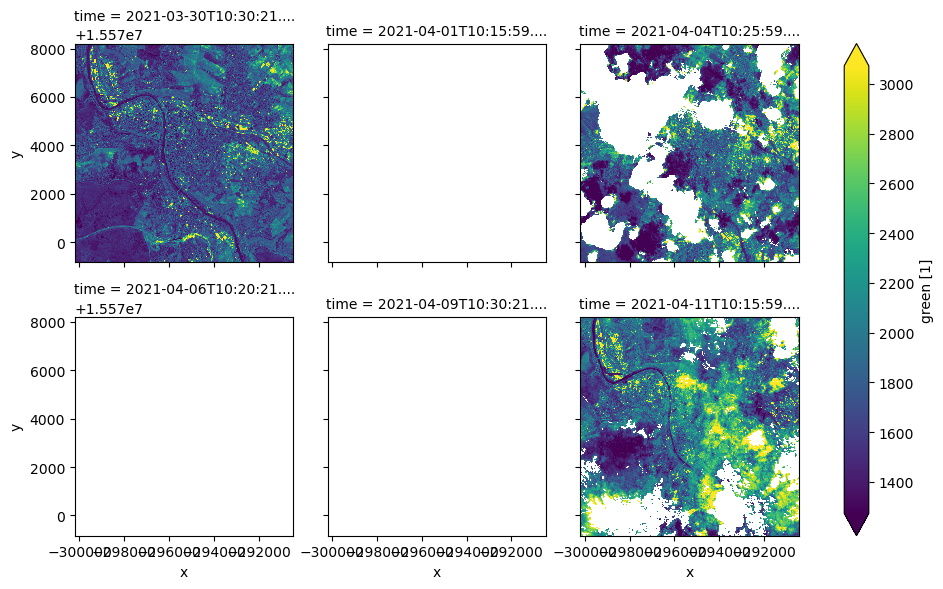

In [32]:
# Combining masking in facet plot
data.isel(time=[11,12,13,14,15, 16]).green.where(data.scl <= 6).plot(robust=True, col="time", col_wrap=3)

## **Time Series Linechart**
Xarray’s plotting capabilities are centered around DataArray objects, and its functionality is a thin wrapper around matplotlib. Hence, many Matplotlib functionalities, such as `plt.title()`, can be easily called. 

To produce a time series plot, we can reduce the dimensions of longitude and latitude with `mean(dim=["longitude","latitude"])` so that we get a single value of the whole area for every single time stamp. The resulting array can be used to plot a linechart with `matplotlib.pyplot`(plt) framework.

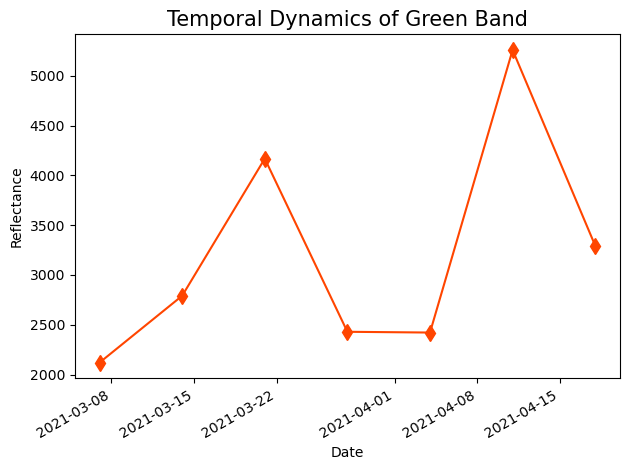

In [33]:
masked = data.green.where(data.scl <= 8)
week_data = masked.median(dim=["x","y"]).resample(time='1w').mean()
ts_plot = week_data.plot(color="orangered", marker="d", markersize=8) #dimension reduction
ts_plot

plt.title("Temporal Dynamics of Green Band", fontsize=15) #define title with matplotlib
plt.ylabel("Reflectance") #labels
plt.xlabel("Date")
plt.tight_layout() #remove excessive space in layout
plt.show() #display plot

Additional arguments can be passed directly to the matplotlib function. We can, for example, also plot histogram with the data array.

## **Using Pandas and Seaborn**
In the plotting basics, we have learned how to create graphics using xarray and pyplot. Yet, we can also utilize pandas and seaborn library with their more developed tools to improve the visuals of our plot. It requires more code but meanwhile gives more flexibility for plot customization.

In [34]:
df2 = data[["green","swir16"]].mean(dim=["x","y"]).to_dataframe() #convert to pandas
df2.head()

green       swir16  spatial_ref
time                                                          
2021-03-02 10:18:39.025  1715.332961  3020.914572        32734
2021-03-05 10:28:09.024  8378.296930  5689.336588        32734
2021-03-07 10:20:21.024  1649.496124  2871.654400        32734
2021-03-10 10:30:21.024  5307.697134  4421.048104        32734
2021-03-12 10:17:29.024  5048.307103  4883.331938        32734

In [35]:
df2 = df2.drop(['spatial_ref'], axis=1) #delete unneeded columns
df2.head()

green       swir16
time                                             
2021-03-02 10:18:39.025  1715.332961  3020.914572
2021-03-05 10:28:09.024  8378.296930  5689.336588
2021-03-07 10:20:21.024  1649.496124  2871.654400
2021-03-10 10:30:21.024  5307.697134  4421.048104
2021-03-12 10:17:29.024  5048.307103  4883.331938

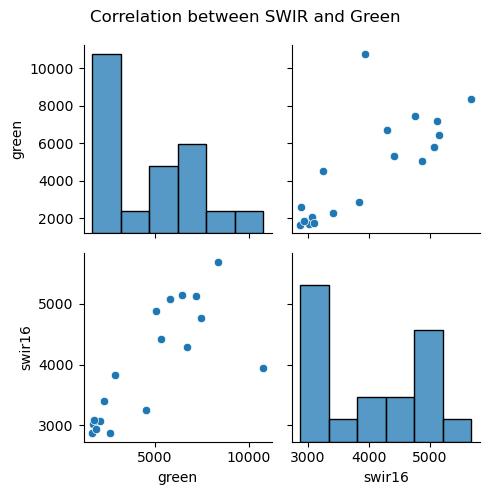

In [36]:
ax3 = sns.pairplot(df2[["green","swir16"]]) #pairplot
plt.suptitle("Correlation between SWIR and Green") #main title
plt.tight_layout()
plt.show()

***

## Additional information

<font size="2">This notebook for the usage in the Open Data Cube entities of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is adapted from [Geoscience Australia](https://github.com/GeoscienceAustralia/dea-notebooks), published using the Apache License, Version 2.0. Thanks! </font>

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** January 2023